<a href="https://colab.research.google.com/github/Bell2307/Estadistica/blob/main/Alphabet_Inc_Class_C_Capital_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

df = yf.download(
    tickers='GOOG',            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2020-01-01',        # Fecha de inicio
    end='2025-04-01',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

df = df.reset_index()
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.date
df.set_index('Date', inplace=True)
df

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GOOG']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


,GOOG_Open,GOOG_High,GOOG_Low,GOOG_Close,GOOG_Adj Close,GOOG_Volume
Date,,,,,,


# Importar dataframe si YF da error

In [2]:
pip install alpha_vantage

In [3]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Entra a https://www.alphavantage.co/support/#api-key

my_key = '8E59X8RXQDK9HQJU'
ts = TimeSeries(key=my_key, output_format='pandas')
ticker = 'GOOG'
data, meta = ts.get_daily(symbol=ticker, outputsize='full')
columnas = [ticker + '_' + i for i in ['Open', 'High', 'Low', 'Close', 'Volume']]
data.columns = columnas
inicio = '2020-01-01'
fin = '2025-04-01'
df = data[(data.index >= inicio) & (data.index <= fin)]
df

,GOOG_Open,GOOG_High,GOOG_Low,GOOG_Close,GOOG_Volume
date,,,,,
2025-04-01,155.30,160.0800,155.2550,158.88,20111376.0
2025-03-31,154.81,157.1300,152.2100,156.23,33591554.0
2025-03-28,162.36,163.8100,155.3394,156.06,34866462.0
2025-03-27,166.71,167.4400,163.8500,164.08,21571174.0
2025-03-26,171.30,171.9396,166.8606,167.14,22554236.0
...,...,...,...,...,...
2020-01-08,1392.08,1411.5800,1390.8400,1404.32,1529177.0
2020-01-07,1397.94,1402.9900,1390.3800,1393.34,1511693.0
2020-01-06,1350.00,1396.5000,1350.0000,1394.21,1733149.0


# Medias móviles

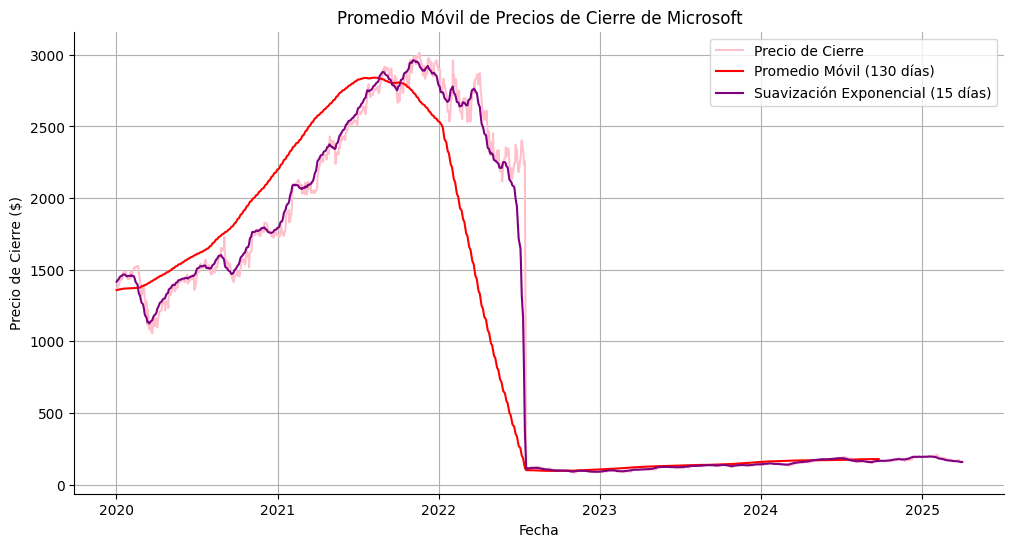

In [5]:
# Promedio Móvil Simple
ventana_sma = 130
df['SMA'] = df['GOOG_Close'].rolling(window=ventana_sma).mean()

# Promedio Móvil Exponencial
ventana_ses = 15
df['SES'] = df['GOOG_Close'].ewm(span=ventana_ses, adjust=False).mean()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['GOOG_Close'], label='Precio de Cierre', color='pink')
plt.plot(df['SMA'], label=f'Promedio Móvil ({ventana_sma} días)', color='red')
plt.plot(df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='purple')
plt.title('Promedio Móvil de Precios de Cierre de Alphabet Inc. Class C Capital Stock')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

# Prueba Dickey-Fuller Aumentada

In [6]:
from statsmodels.tsa.stattools import adfuller
nivel_de_significancia = 0.05
adf_test = adfuller(df['GOOG_Close'].dropna())
print('Estadístico ADF:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")


Estadístico ADF: -1.2784360659628786
p-value: 0.6389791976740354
La tendencia no es estacionaria (aceptamos la hipótesis nula).


# Regresión polinomial

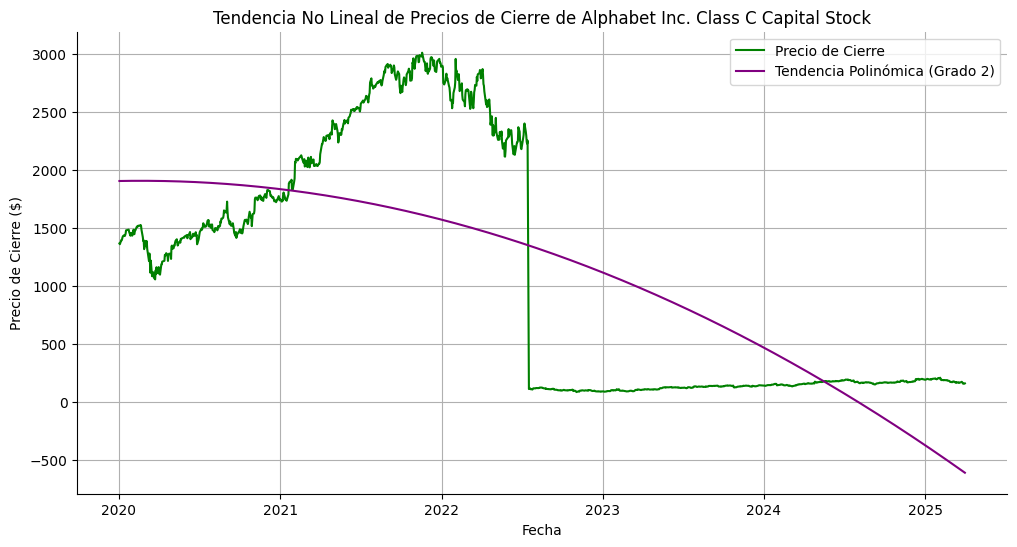

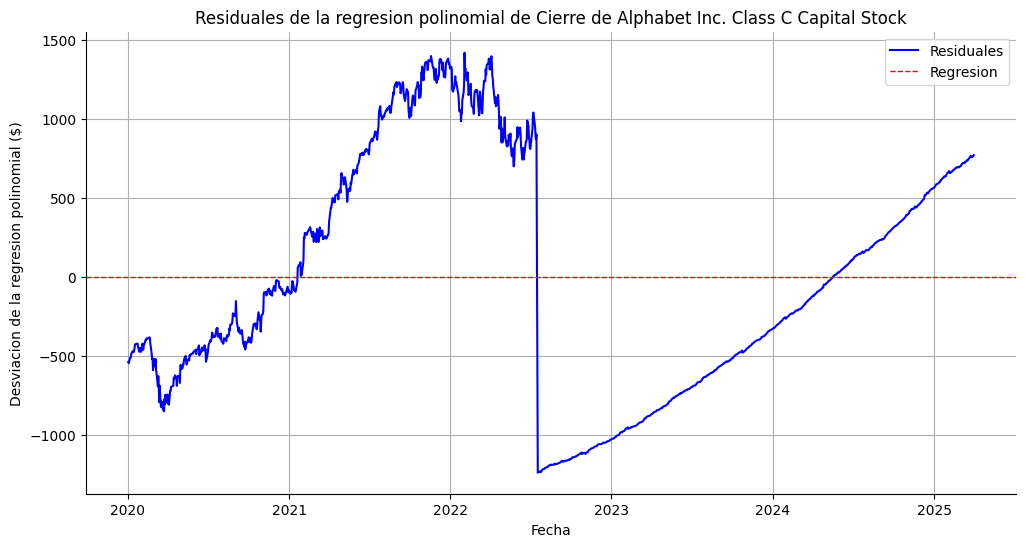

In [7]:
from numpy.polynomial.polynomial import Polynomial
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)
X = df['Date']
y = df['GOOG_Close']
grado = 2
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid'] = y - df['Poly_Trend']
plt.figure(
    figsize=(12, 6)
    )

plt.plot(
    y,
    label='Precio de Cierre',
    color='green'
    )
plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='purple')
plt.title('Tendencia No Lineal de Precios de Cierre de Alphabet Inc. Class C Capital Stock')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(df['Poly_Resid'], label='Residuales', color='blue')
plt.axhline(0, color='red', label='Regresion',linestyle='--', linewidth=1)
plt.title('Residuales de la regresion polinomial de Cierre de Alphabet Inc. Class C Capital Stock')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller
nivel_de_significancia = 0.05
adf_test = adfuller(df['GOOG_Close'].dropna())
print('Estadístico ADF:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")

Estadístico ADF: -1.2784360659628786
p-value: 0.6389791976740354
La tendencia no es estacionaria (aceptamos la hipótesis nula).
